# DescTC( ) 

https://github.com/marianealves

&nbsp;
 
## To save you time!     <(ºvº)>** 

&nbsp;

**It provides valuable information and the distributions of each variable of you data frame helping you to decide which data cleansing method you should use without having to type lots of commands one at a time.**


&nbsp;

Methods provided:


 **DescTC.table( )**

    Offers you the following information of each quantitative/qualitative variable:

    - Type 
    - Quantity of zero numbers
    - Quantity of NaN's
    - % of NaN's 
    - Quantity of uniques values 
    - Quantity of outliers
    - Min value / Lowest category
    - Mean
    - Median
    - Moda 
    - Max value / Highest category


 **DescTC.chart( )**
 
    Condense large amounts of information of each variable into easy-to-understand
    formats that clearly and effectively communicate important points:

    - Plot the distribution of each variable 
    - Box plot of each quantitative variables
    - Plot the correlation between quantitative variables
    
&nbsp;

  *Please be aware that your data must be coverted to a pandas DataFrame with column names.*


See below the tool outcome for two different pandas DataFrames. ("census" and "house-prices")

In [1]:
class DescTC():
    """
    It generates a range of information of the data provided. 
    It gives a better visualization of the data before the cleansing job is done.
    It helps deciding the better cleansing method that should be used before starting the data analysis.
    """
    def __init__(self, df):
        self.df = df


    def table(self):
        """Analyses ``DataFrame`` column sets of mixed data types. The output
        will vary depending on the colums type. Refer to the notes
        below for more detail.

        Returns
        -------
        DataFrame
            Summary information and some of the descriptive statistics of the data provided.

        ``Type``: is the type of the column values of the column, 
        ``Quant.Zeros``: is the quantity of the zero values of the column,
        ``Quant.NaNs``: is the quantity of the NaN values of the column, 
        ``%NaNs``: is the percentage of the NaN values of the column, 
        ``Quant.Uniques``: is the quantity of unique values of the column, 
        ``Quant.Outliers``: is the quantity of unique values of the column, 
        ``Min/Lowest``: is the minimum value of the numeric column or the lowest value of the categorical column, 
        ``Mean``: is the average/mean of the values of the numeric column, 
        ``Median``: is the 50th percentile of the numeric column, 
        ``Mode``: is the most often value of the column , 
        ``Max/Highest``: is the maximum value of the numeric column or the most common value of the categorical column.

        The z-score is the outlier finder method used. This method can only be used with
        a gaussian distribution. Disregard this outlier output if the distribution
        of the variable can not be assumed to be parametric.
        
        If multiple object values have the lowest/highest count, 
        then the results will be arbitrarily chosen from
        among those with the lowest/highest count.

        Notes
        -----
        All columns of the input will be included in the output.
        Only pandas DataFrame with no empty entire columns will be considered.
        """
    
        import numpy as np       
        col_list = []
        zr_list = []
        unique_list = []
        miss_table = []
        outlier = []
        mean_list = []
        median_list = []
        mode_list =[]
        max_list = []
        min_list = []
        O_col_name = []
        O_col_pos = []

        for colname in self.df:
            zeros = len(self.df) - np.count_nonzero(self.df[colname].tolist())
            zr_list.append(zeros)
            unique = self.df[colname].unique()
            unique_list.append(unique)
            mode = self.df[colname].mode()[0]
            mode_list.append(mode)
            col_list.append(colname)
            
            # Replacing question marks with np.nan
            self.df[colname] = self.df[colname].apply(lambda x: np.nan if str(x).find('?')>-1 else x)

        types = self.df.dtypes.tolist()
        nan = self.df.isna().sum().tolist()
        nanp = round((self.df.isna().sum() * 100/ len(self.df)),2).tolist()


        # Describing NUMERICAL variables
        # Creating a dataframe column with number 1 to replace object columns
        c_ones = np.ones(len(self.df))
        
        # Creating a new dataFrame without the non-numeric columns and finding their names and positions to create a new df.
        for col in self.df.columns:
            if self.df.dtypes[col] == "O" or self.df.dtypes[col] == "bool":
                O_col_name.append(self.df[col].name)
                O_col_pos.append(self.df.columns.get_loc(self.df[col].name))
        df_new = self.df.drop(self.df.columns[O_col_pos],axis=1)

        # Creating another DataFrame (df_pad) with the Zscore without the non-numeric columns
        from scipy import stats
        from scipy.stats import zscore
        df_pad = stats.zscore(df_new)
        df_pad = pd.DataFrame(df_pad, columns = df_new.columns.tolist())

        # Inserting the non-numeric columns on the df_pad (dataframe Zscore)
        for i in range(len(O_col_pos)):
            df_pad.insert(loc = O_col_pos[i] , column = O_col_name[i], value = c_ones )
        
        # Finding quantity of outliers for each column , c = number of columns
        for c in range(len(df_pad.columns)):
            out_col = []
            count = 0
            for j in df_pad.values[:,c]:
                if np.abs(j) > 3:
                    count += 1
            out_col.append(count)
            outlier.append(out_col) 

        # Finding Max, Min, Average and median for each column
        for c in self.df.columns:
            if c not in O_col_name:
                max_list.append(self.df[c].max()) 
                min_list.append(self.df[c].min())
                mean_list.append(self.df[c].mean())
                median_list.append(self.df[c].median())
    
            else:
                max_list.append(self.df[c].value_counts().index[:1][0]) 
                min_list.append(self.df[c].value_counts().index[:len(self.df[c].unique())][-1])
                mean_list.append("NaN")
                median_list.append("NaN")
                
        # Final result 
        for i in range(len(self.df.columns)):
            df_missing = [types[i], zr_list[i] ,nan[i], nanp[i], len(set(unique_list[i])), outlier[i], min_list[i], mean_list[i], median_list[i],mode_list[i], max_list[i] ]
            miss_table.append(df_missing)

        missing_table = pd.DataFrame(miss_table, index = col_list, 
        columns=["Type", "Quant.Zeros","Quant.NaNs", "%NaNs", "Quant.Uniques", "Quant.Outliers", "Min/Lowest", "Mean", "Median", "Mode", "Max/Highest"])
        return missing_table
    
    
    def chart(self):
        """
        condense large amounts of information into easy-to-understand formats 
        that clearly and effectively communicate important points
        
        Returns
        -------
        Plot a countplot for qualitative variables
        Plot a histogram and box plot for quantitative variables
        Plot the correlation between quantitative variables
        """
        
        import matplotlib.pyplot as plt
        import seaborn as sns
        %matplotlib inline
        
        # Distribution Chart for each dataframe column
        for col in self.df.columns:
            print('Variable: \033[34m{}\033[m'.format(col))
            if self.df.dtypes[col] == "O" or self.df.dtypes[col] == "bool":
                if len(self.df[col].unique()) > 50:
                    print('Since the variable \033[32m{}\033[m has several distinct values, the visualization process through the chart is not a good option.'.format(col))
                    print()
                    print()

                else: 
                    plt.figure(figsize=(9,4))
                    chart = sns.countplot(x = col, data = self.df, order = self.df[col].value_counts().index)
                    plt.xticks(rotation=45, horizontalalignment='right')
                    plt.grid(color='gray', ls = '-.', lw = 0.08)
                    plt.show()
                    print()
                    print()
                    
            else: 
                fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
                
                ax1.hist(self.df[col], label=col, bins='sqrt')
                ax1.set(title="Frequency Chart", xlabel=col, ylabel="count")
                ax1.grid(color='gray', ls = '-.', lw = 0.08)
                plt.setp(ax1.get_xticklabels(), rotation=15)
        
                red_diamond = dict(markerfacecolor='r', marker='D')
                ax2.boxplot(self.df[col], flierprops=red_diamond)
                ax2.set(title="Box-Plot", xlabel=col, ylabel="values")
                ax2.grid(color='gray', ls = '-.', lw = 0.08)
               
                plt.show()
                print()
                print()
        
        # Correlation Plot
        if self.df.shape[1]<=10:
            plt.figure(figsize=(5,5))
        elif self.df.shape[1]<=20:
            plt.figure(figsize=(8,8))
        else:
            plt.figure(figsize=(20,20))
        sns.heatmap(self.df.corr(), annot=True, cmap='RdBu')
        plt.title('Correlation Plot - Heatmap', fontsize = 14)
        plt.xticks(rotation = 15)
        plt.yticks(rotation = 15)

## First example: *Census*

In [2]:
import pandas as pd

df1 = pd.read_csv("census.csv")

#### Creating a new instance of DescTC( ) 

In [3]:
test1 = DescTC(df1)

#### Printing the head/tail of DataFrame df1

In [4]:
test1.df

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


#### Accessing the method: DescTC.table( )

In [5]:
test1.table()

,Type,Quant.Zeros,Quant.NaNs,%NaNs,Quant.Uniques,Quant.Outliers,Min/Lowest,Mean,Median,Mode,Max/Highest
age,int64,0,0,0.00,73,[121],17,38.5816,37,36,90
workclass,object,0,1836,5.64,9,[0],Never-worked,NaN,NaN,Private,Private
final-weight,int64,0,0,0.00,21648,[347],12285,189778,178356,123011,1484705
education,object,0,0,0.00,16,[0],Preschool,NaN,NaN,HS-grad,HS-grad
education-num,int64,0,0,0.00,16,[219],1,10.0807,10,9,16
marital-status,object,0,0,0.00,7,[0],Married-AF-spouse,NaN,NaN,Married-civ-spouse,Married-civ-spouse
occupation,object,0,1843,5.66,15,[0],Armed-Forces,NaN,NaN,Prof-specialty,Prof-specialty
relationship,object,0,0,0.00,6,[0],Other-relative,NaN,NaN,Husband,Husband
race,object,0,0,0.00,5,[0],Other,NaN,NaN,White,White
sex,object,0,0,0.00,2,[0],Female,NaN,NaN,Male,Male


#### Accessing the method: DescTC.chart( )

Variable: age


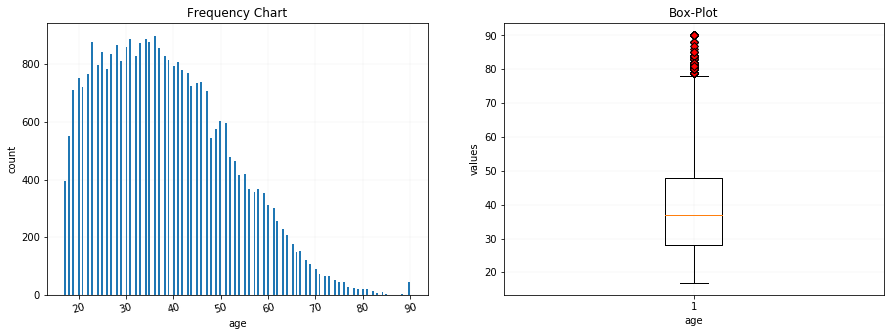



Variable: workclass


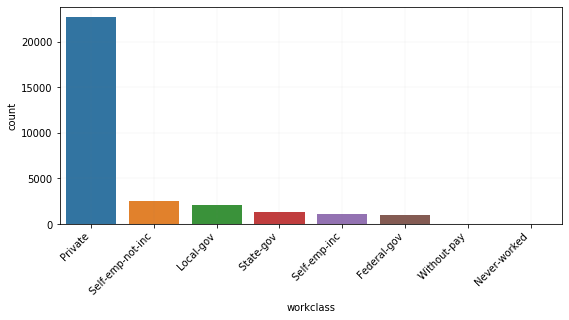



Variable: final-weight


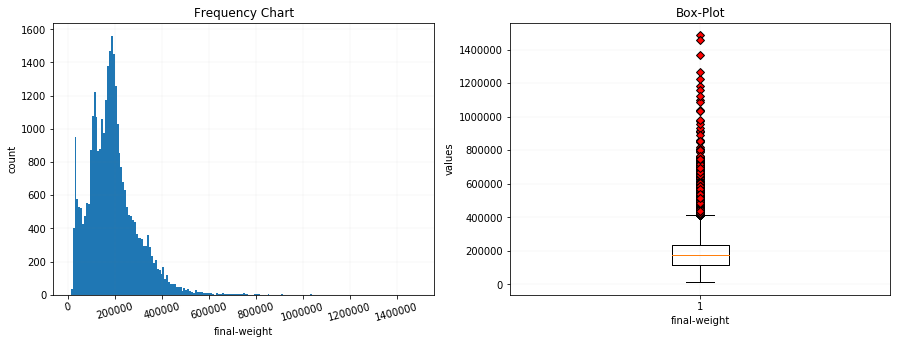



Variable: education


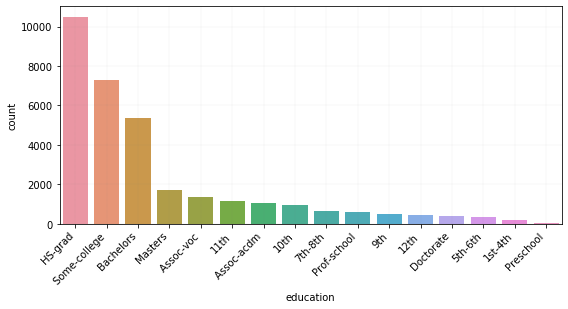



Variable: education-num


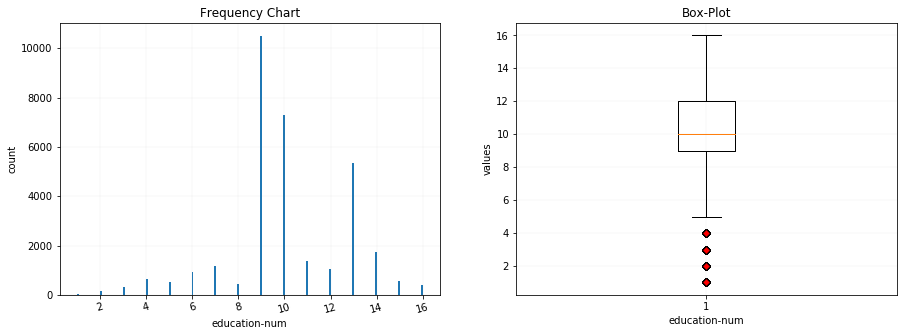



Variable: marital-status


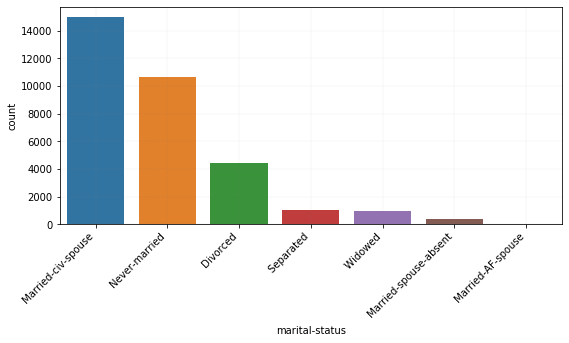



Variable: occupation


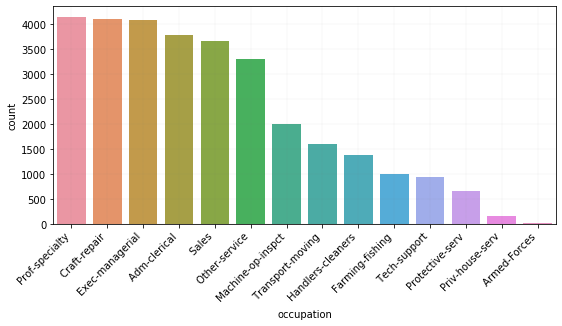



Variable: relationship


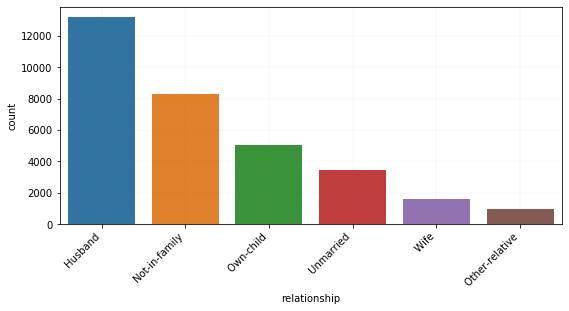



Variable: race


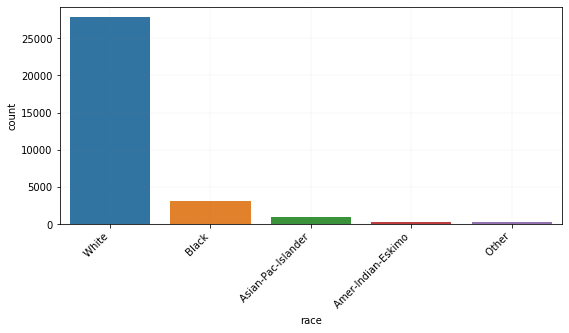



Variable: sex


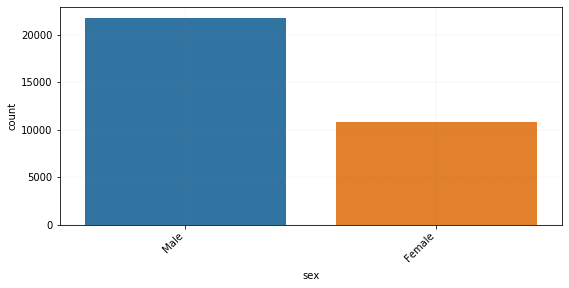



Variable: capital-gain


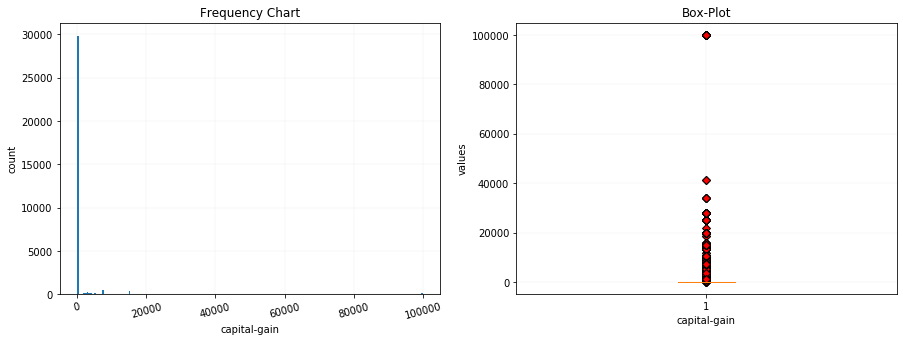



Variable: capital-loos


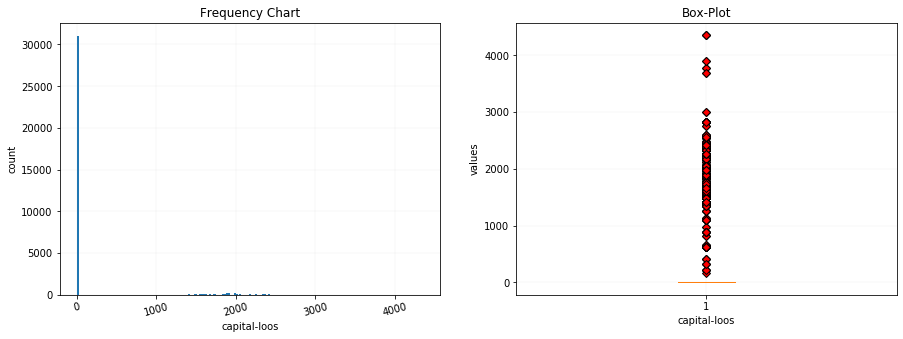



Variable: hour-per-week


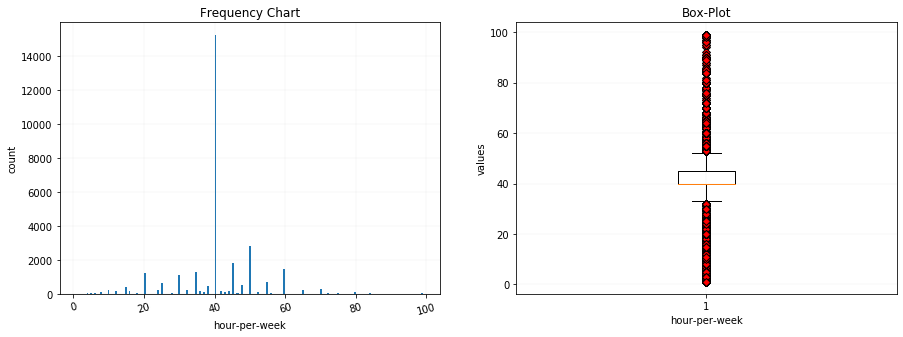



Variable: native-country


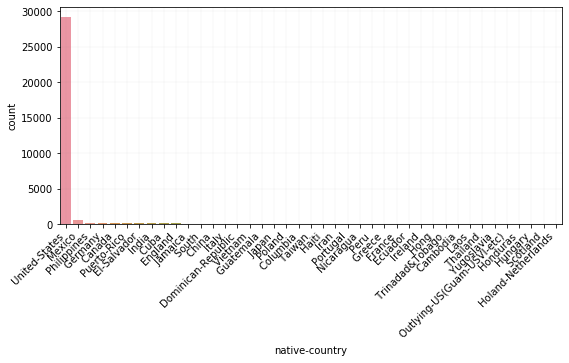



Variable: income


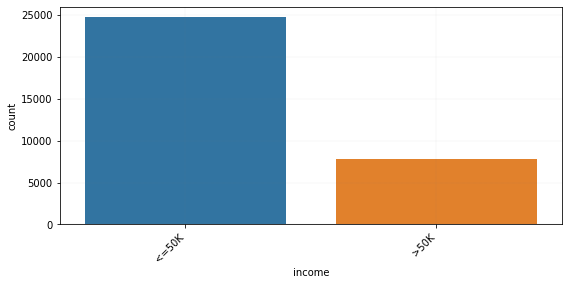

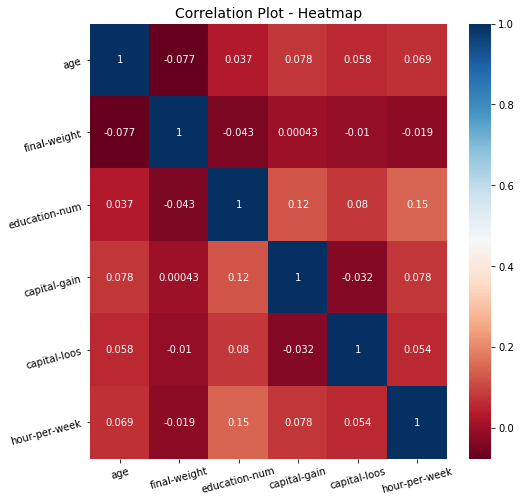

In [6]:
test1.chart()

## Second example: *House prices*

In [7]:
df2 = pd.read_csv("house_prices.csv")

test2 = DescTC(df2)

test2.df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [8]:
test2.table()

,Type,Quant.Zeros,Quant.NaNs,%NaNs,Quant.Uniques,Quant.Outliers,Min/Lowest,Mean,Median,Mode,Max/Highest
id,int64,0,0,0.0,21436,[0],1000102,4.5803e+09,3.90493e+09,795000620,9900000190
date,object,0,0,0.0,372,[0],20140803T000000,NaN,NaN,20140623T000000,20140623T000000
price,float64,0,0,0.0,4028,[406],75000,540088,450000,350000,7.7e+06
bedrooms,int64,13,0,0.0,13,[75],0,3.37084,3,3,33
bathrooms,float64,10,0,0.0,30,[187],0,2.11476,2.25,2.5,8
sqft_living,int64,0,0,0.0,1038,[248],290,2079.9,1910,1300,13540
sqft_lot,int64,0,0,0.0,9782,[347],520,15107,7618,5000,1651359
floors,float64,0,0,0.0,6,[8],1,1.49431,1.5,1,3.5
waterfront,int64,21450,0,0.0,2,[163],0,0.00754176,0,0,1
view,int64,19489,0,0.0,5,[829],0,0.234303,0,0,4


Variable: id


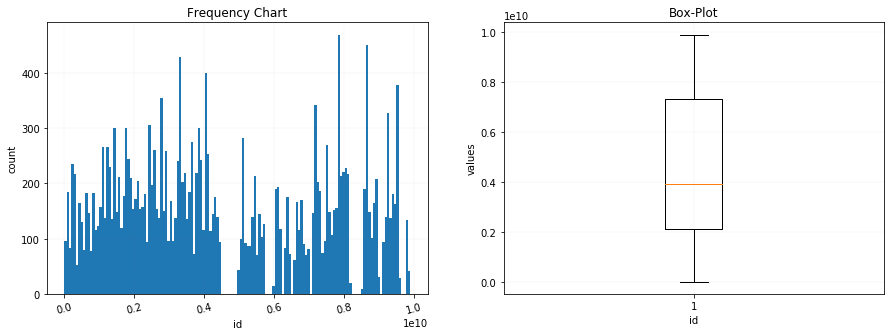



Variable: date
Since the variable date has several distinct values, the visualization process through the chart is not a good option.


Variable: price


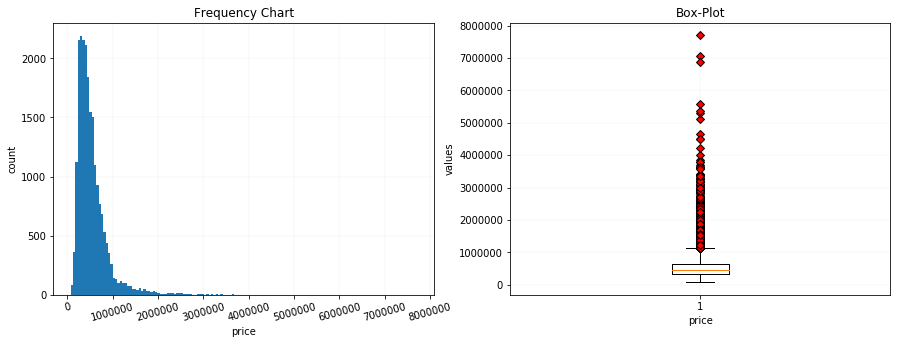



Variable: bedrooms


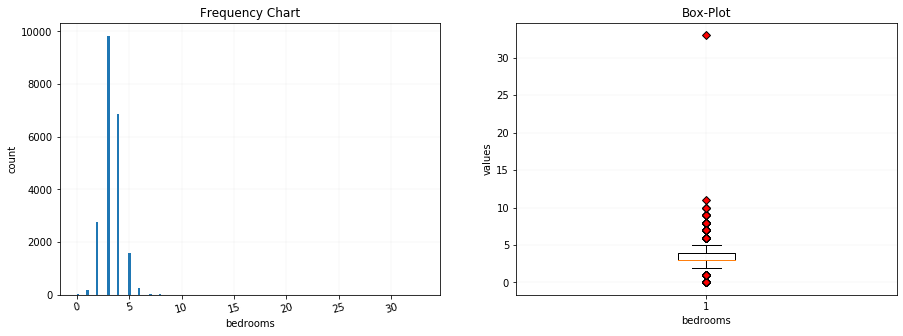



Variable: bathrooms


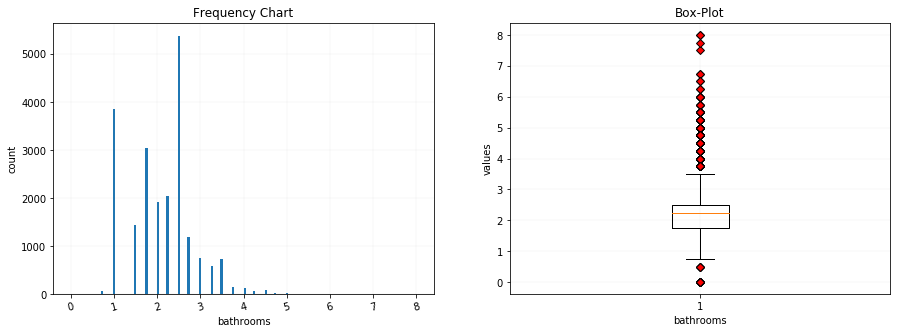



Variable: sqft_living


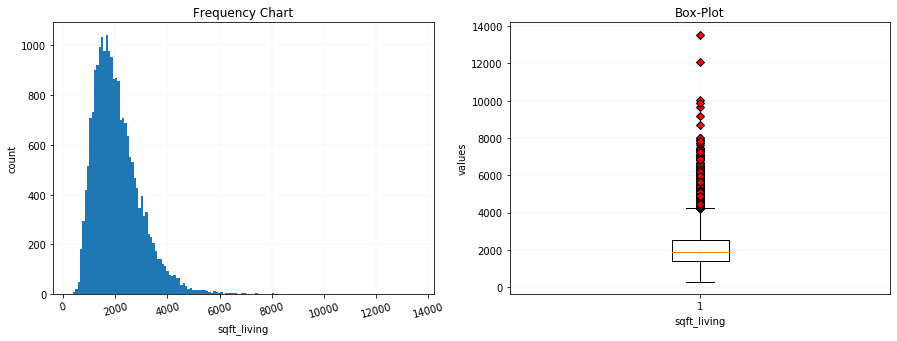



Variable: sqft_lot


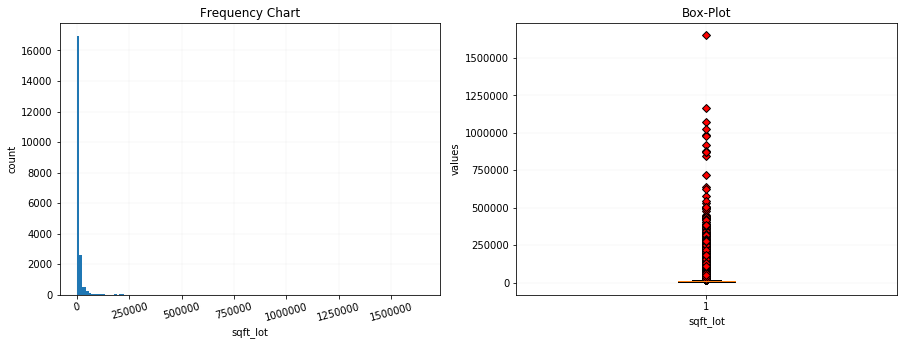



Variable: floors


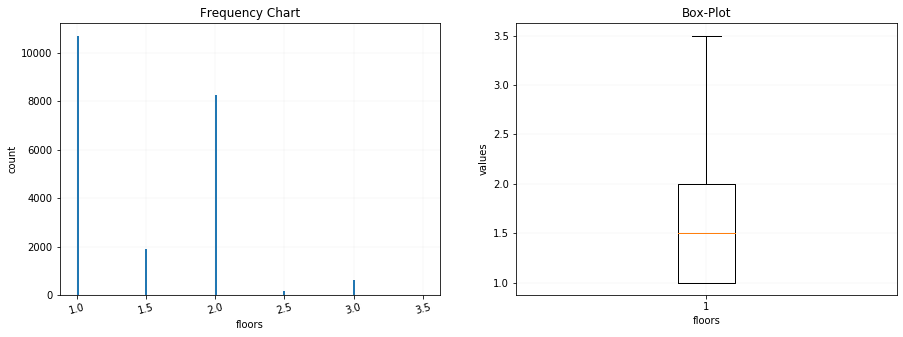



Variable: waterfront


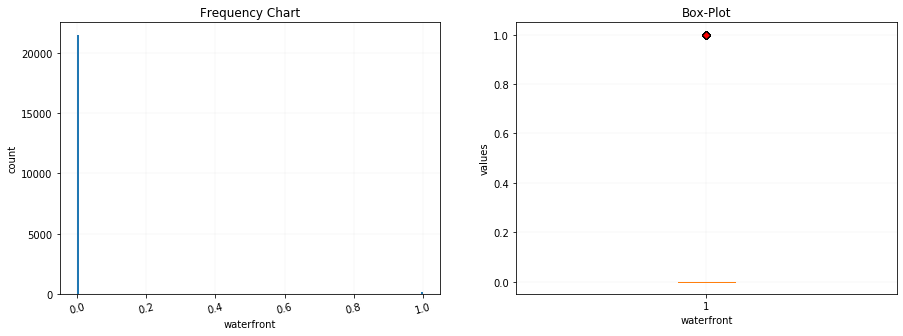



Variable: view


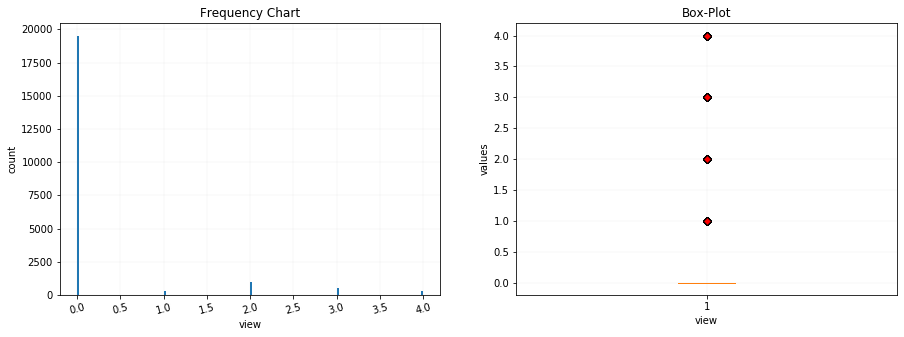



Variable: condition


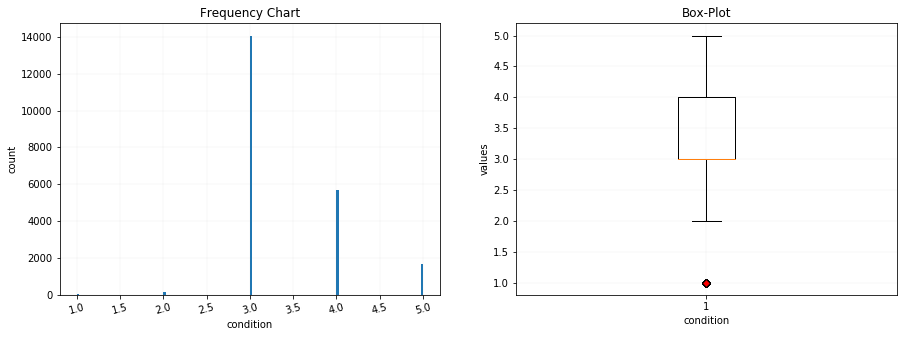



Variable: grade


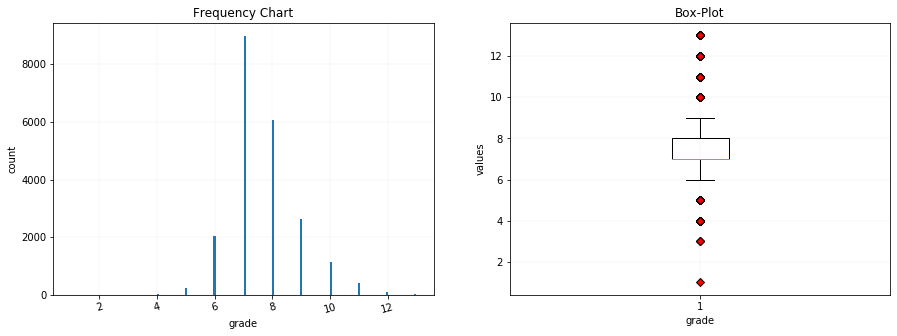



Variable: sqft_above


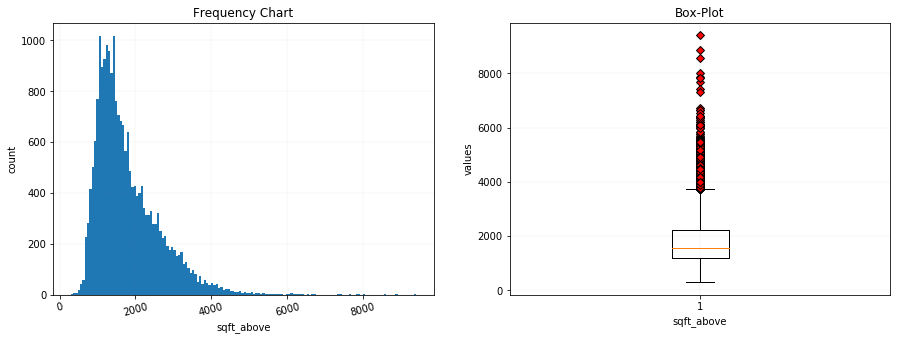



Variable: sqft_basement


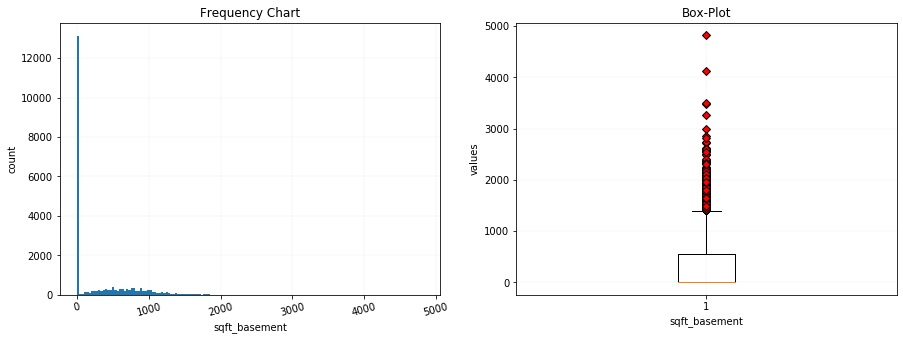



Variable: yr_built


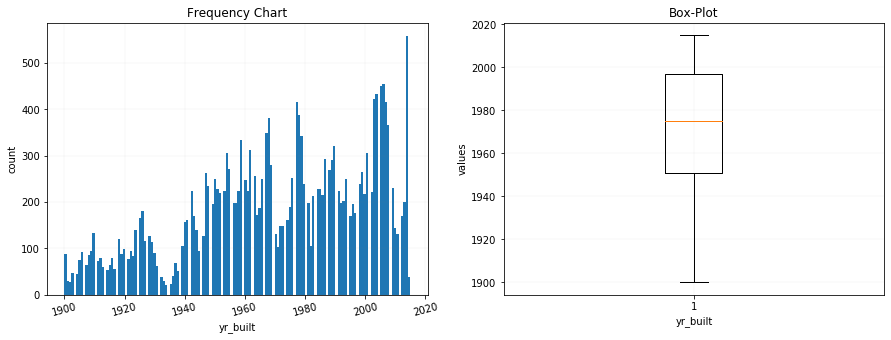



Variable: yr_renovated


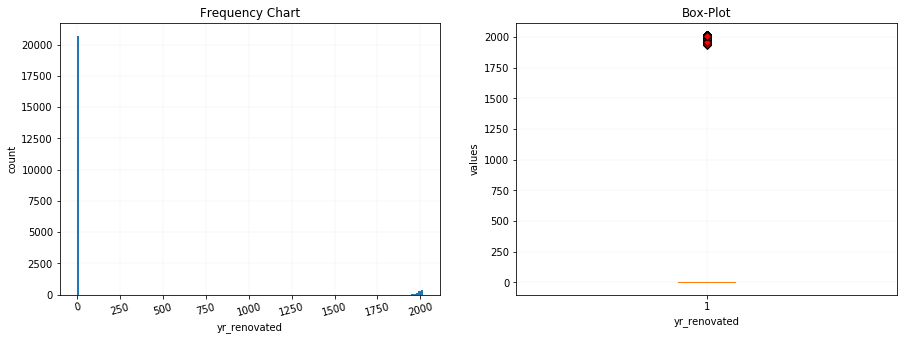



Variable: zipcode


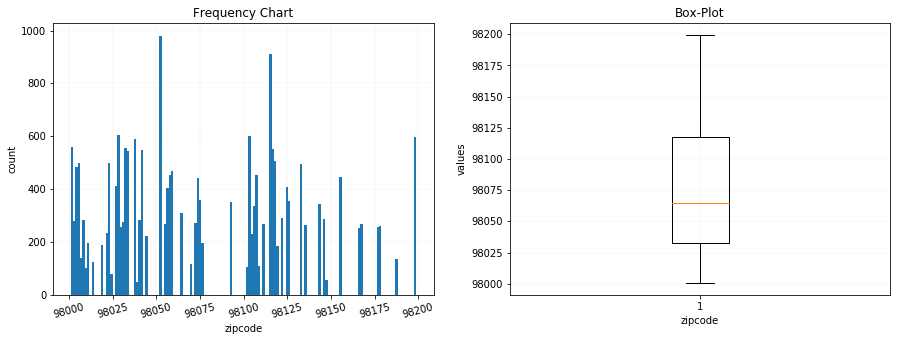



Variable: lat


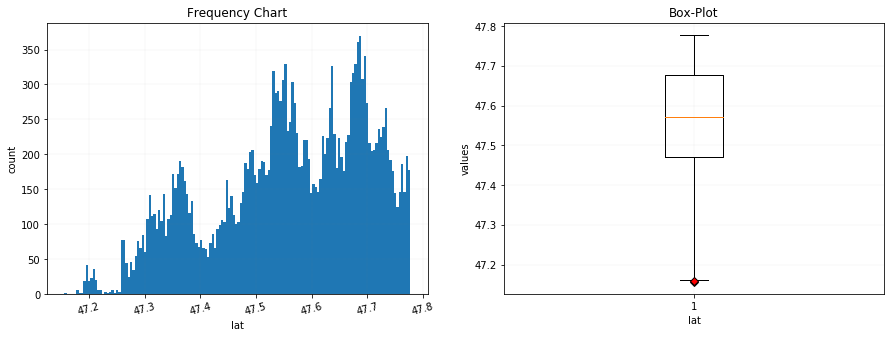



Variable: long


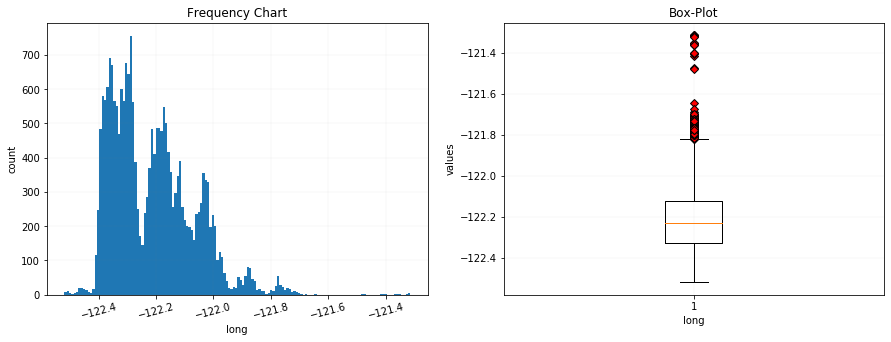



Variable: sqft_living15


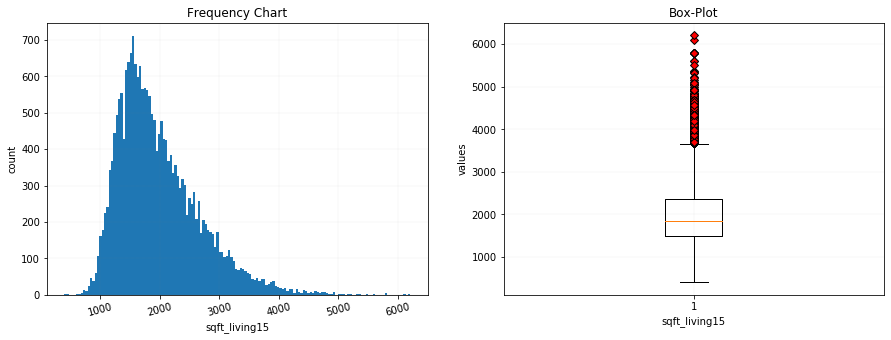



Variable: sqft_lot15


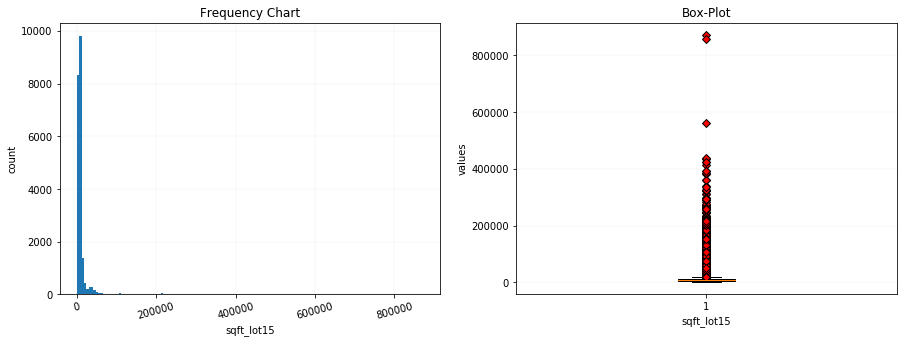

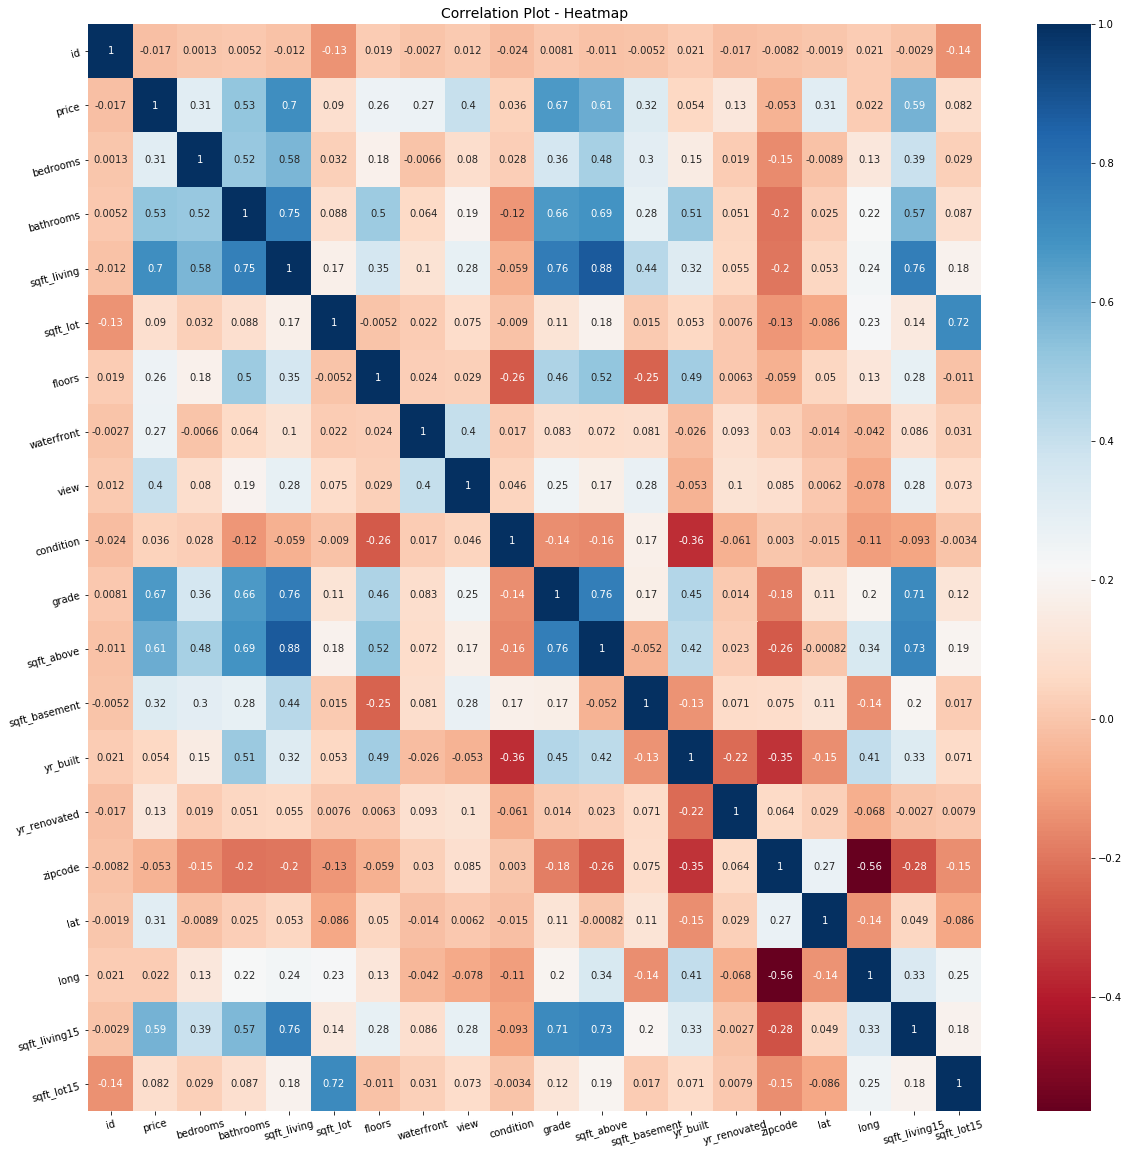

In [9]:
test2.chart()